In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

d = pd.read_csv("combined.csv")
d2 = d[(d['SourcenumRecordsOutPerSecond_avg'] >= (d['rate'] * 0.95))]



/tmp/ipykernel_2744435/1060970613.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
d2.columns

Index(['Unnamed: 0', 'i', 'itr', 'dvfs', 'rate', 'policy', 'nwindows',
       'CheckpointInterval', 'CheckpointMode', 'pkg_watts_avg',
       'pkg_watts_std', 'ram_watts_avg', 'ram_watts_std',
       'SinknumRecordsInPerSecond_avg', 'SinknumRecordsInPerSecond_std',
       'SinknumRecordsOutPerSecond_avg', 'SinknumRecordsOutPerSecond_std',
       'SinkbusyTimeMsPerSecond_avg', 'SinkbusyTimeMsPerSecond_std',
       'SinkbackPressuredTimeMsPerSecond_avg',
       'SinkbackPressuredTimeMsPerSecond_std', 'SinkbusyTime_%',
       'SinkbackPressuredTime_%', 'SourcenumRecordsInPerSecond_avg',
       'SourcenumRecordsInPerSecond_std', 'SourcenumRecordsOutPerSecond_avg',
       'SourcenumRecordsOutPerSecond_std', 'SourcebusyTimeMsPerSecond_avg',
       'SourcebusyTimeMsPerSecond_std',
       'SourcebackPressuredTimeMsPerSecond_avg',
       'SourcebackPressuredTimeMsPerSecond_std', 'SourcebusyTime_%',
       'SourcebackPressuredTime_%', 'WindownumRecordsInPerSecond_avg',
       'WindownumRecordsIn

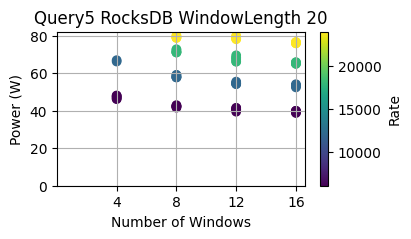

In [3]:
plt.figure(figsize=(4,2))
plt.scatter(d2['nwindows'], d2['pkg_watts_avg'], c=d2['rate'], cmap='viridis')
plt.colorbar(label='Rate')
plt.xticks(d2.nwindows.unique())
plt.xlabel('Number of Windows')
plt.ylabel('Power (W)')
plt.title('Query5 RocksDB WindowLength 20')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid()


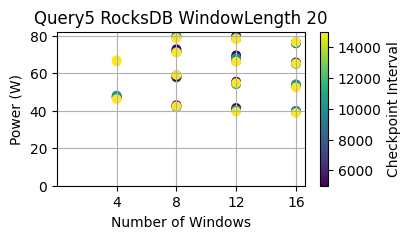

In [5]:
plt.figure(figsize=(4,2))
plt.scatter(d2['nwindows'], d2['pkg_watts_avg'], c=d2['CheckpointInterval'], cmap='viridis')
plt.colorbar(label='Checkpoint Interval')
plt.xticks(d2.nwindows.unique())
plt.xlabel('Number of Windows')
plt.ylabel('Power (W)')
plt.title('Query5 RocksDB WindowLength 20')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid()


In [7]:

plt.figure(figsize=(4,2))
plt.scatter(d2['nwindows'], d2['pkg_watts_avg'], c=ckmode[d2['CheckpointMode']], cmap='viridis')
plt.colorbar(label='Checkpoint Mode')
plt.xticks(d2.nwindows.unique())
plt.xlabel('Number of Windows')
plt.ylabel('Power (W)')
plt.title('Query5 RocksDB WindowLength 20')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid()


TypeError: unhashable type: 'Series'

<Figure size 400x200 with 0 Axes>